In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Signal and Image Processing With Python/Section17_Gray Level OR Point Level Transformation

# Negative Point Transformation

In [111]:
img = cv2.imread('Skull.jpg', 0)

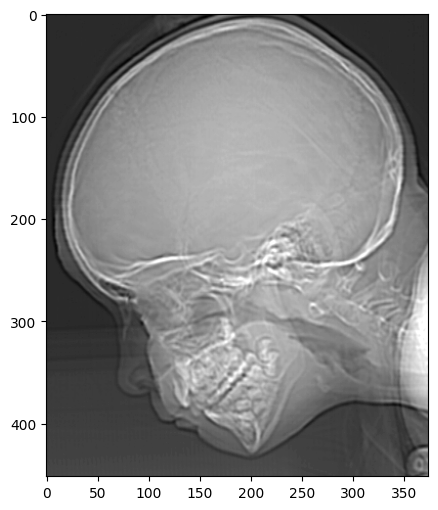

In [112]:
plt.figure(figsize=(12,6))
plt.imshow(img, cmap = 'gray')
plt.show()

In [113]:
print(type(img))
print(" ")
print(img.dtype)
print(" ")
print(img.shape)
print(" ")
print(np.max(img))
print(" ")
print(np.min(img))

<class 'numpy.ndarray'>
 
uint8
 
(452, 374)
 
255
 
12


In [114]:
img_negative = abs(255-img)

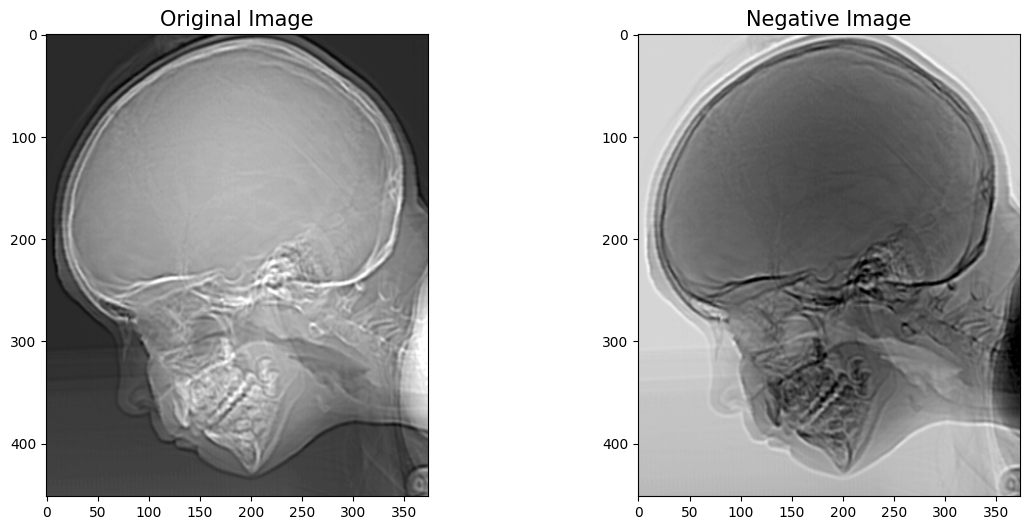

In [115]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(img, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Negative Image", fontsize = 15)
plt.imshow(img_negative, cmap = 'gray')
plt.show()

In [116]:
print(np.max(img_negative))
print(" ")
print(np.min(img_negative))

243
 
0


# Log Transformation

In [117]:
moon = cv2.imread('moon.jpg',0)

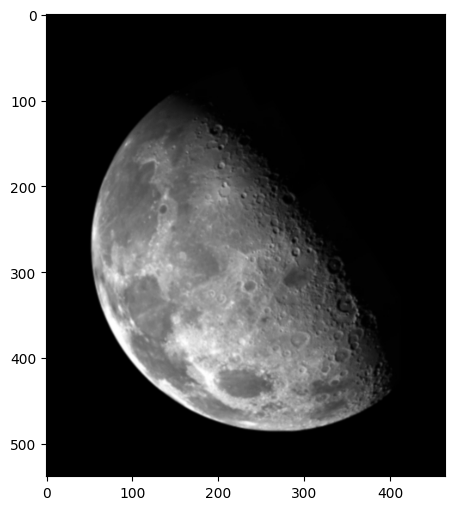

In [118]:
plt.figure(figsize=(12,6))
plt.imshow(moon, cmap = 'gray')
plt.show()

In [119]:
# Apply log transform.
c = 255/(np.log(1 + np.max(moon)))
moon_logTransformed = c * (np.log(moon + 1))

<ipython-input-119-fc2f28de860e>:3: RuntimeWarning: divide by zero encountered in log
  moon_logTransformed = c * (np.log(moon + 1))


In [120]:
print(moon_logTransformed.dtype)

float16


In [121]:
# Specify the data type.
moon_logTransformed = np.array(moon_logTransformed, dtype = np.uint8)

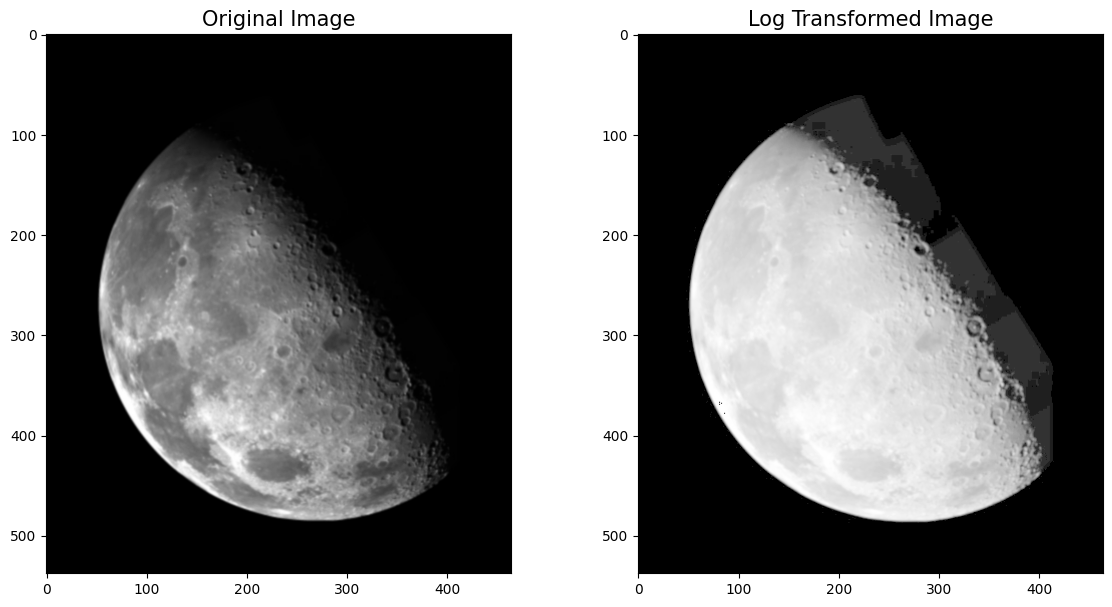

In [122]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(moon, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Log Transformed Image", fontsize = 15)
plt.imshow(moon_logTransformed, cmap = 'gray')
plt.show()

# Another Example

In [123]:
rice = cv2.imread('rice.jpg',0)

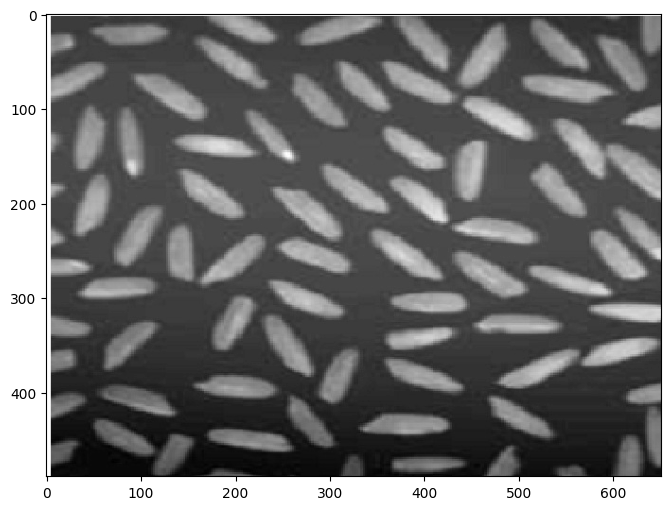

In [124]:
plt.figure(figsize=(12,6))
plt.imshow(rice, cmap = 'gray')
plt.show()

In [ ]:
# Apply log transform.
c = 255/(np.log(1 + np.max(rice)))
rice_logTransformed = c * (np.log(rice + 1))

In [125]:
# Specify the data type.
rice_logTransformed = np.array(rice_logTransformed, dtype = np.uint8)

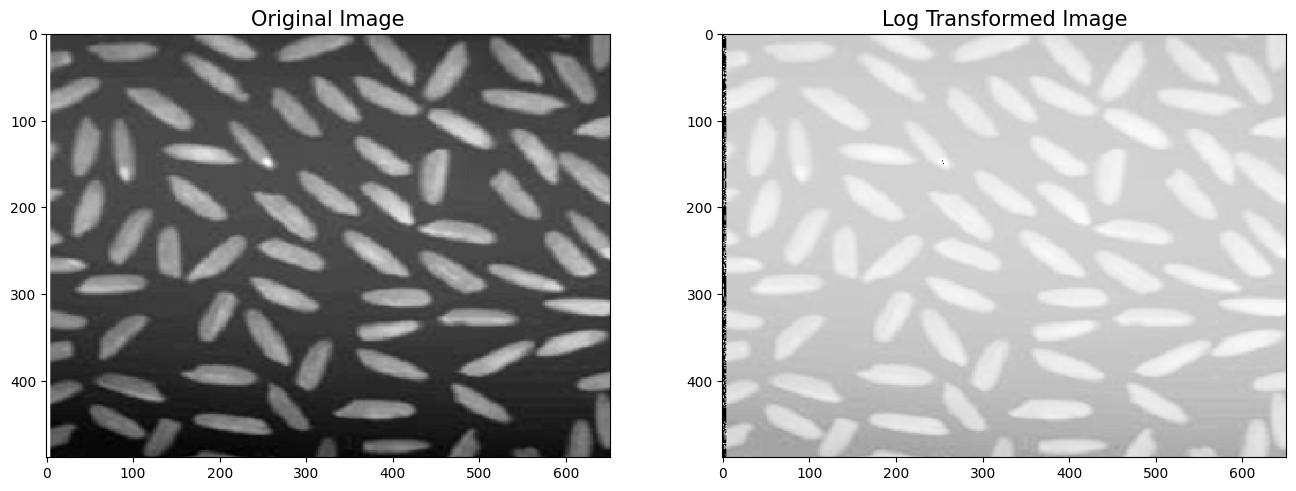

In [126]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(rice, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Log Transformed Image", fontsize = 15)
plt.imshow(rice_logTransformed, cmap = 'gray')
plt.show()

# Power Law (Gamma Transformation)

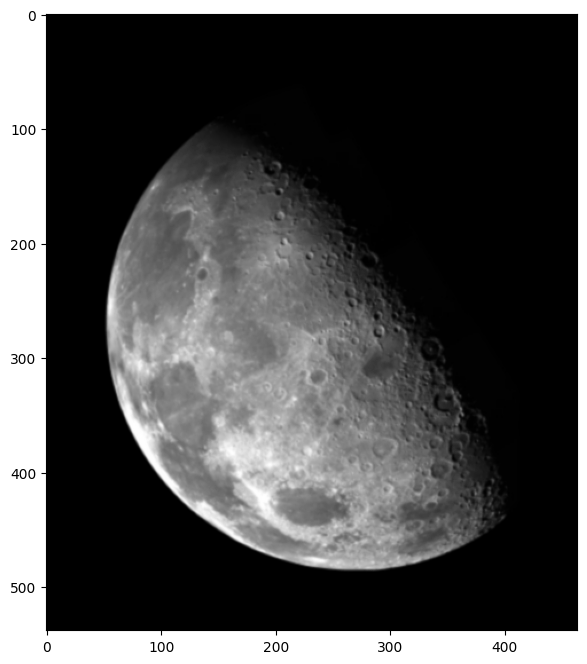

In [127]:
plt.figure(figsize=(16,8))
plt.imshow(moon, cmap = 'gray')
plt.show()

In [128]:
moon_gamma = 1 * (moon ** 1.5)  # where c = 1  and gamma = 1.5

In [129]:
moon_gamma = np.array(moon_gamma, dtype = np.uint8)

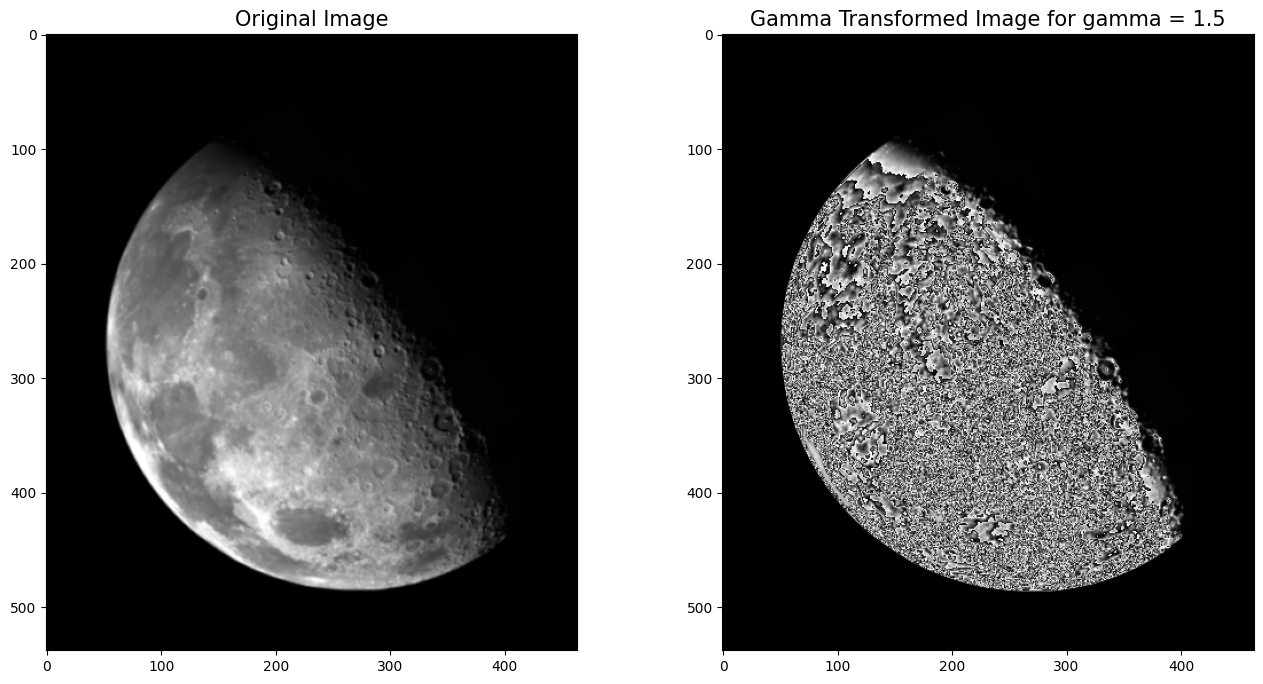

In [130]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(moon, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Gamma Transformed Image for gamma = 1.5", fontsize = 15)
plt.imshow(moon_gamma, cmap = 'gray')
plt.show()

In [131]:
moon_gamma_2 = 1 * (moon ** 0.3)  # where c = 1  and gamma = 0.3

In [132]:
moon_gamma_2 = np.array(moon_gamma_2, dtype = np.uint8)

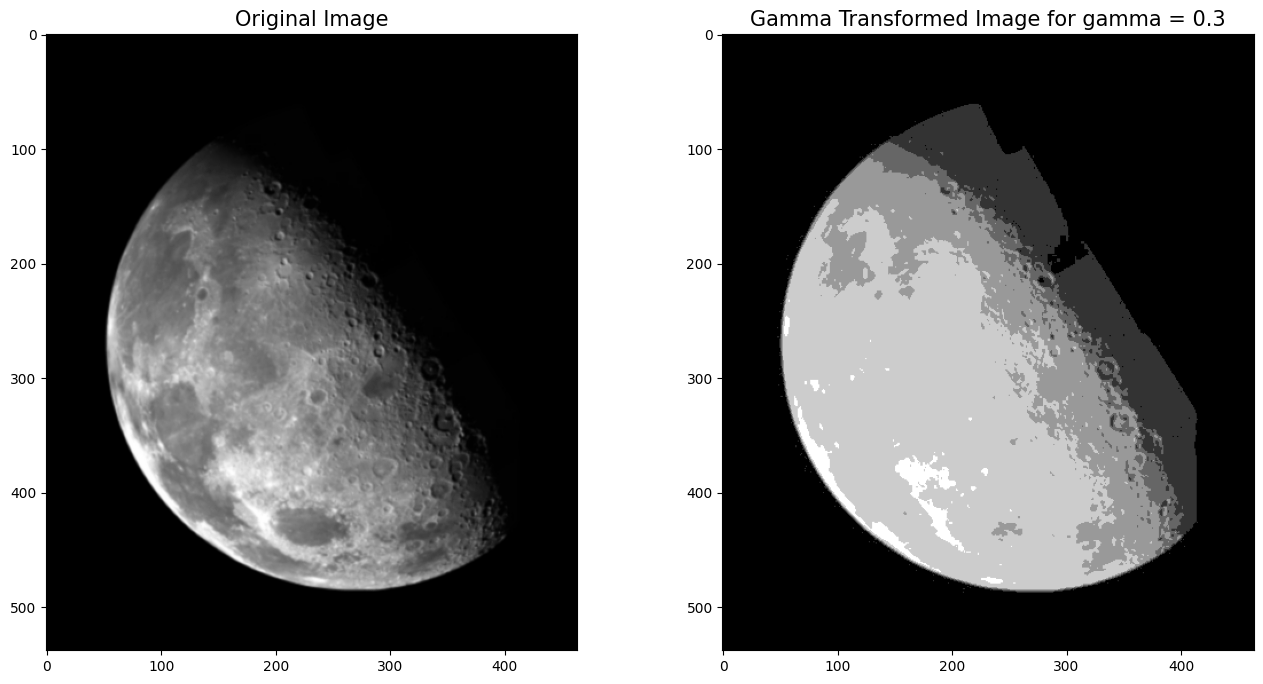

In [133]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(moon, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Gamma Transformed Image for gamma = 0.3", fontsize = 15)
plt.imshow(moon_gamma_2, cmap = 'gray')
plt.show()

# Auto-contrast Function

In [134]:
rice = cv2.imread('rice.jpg')

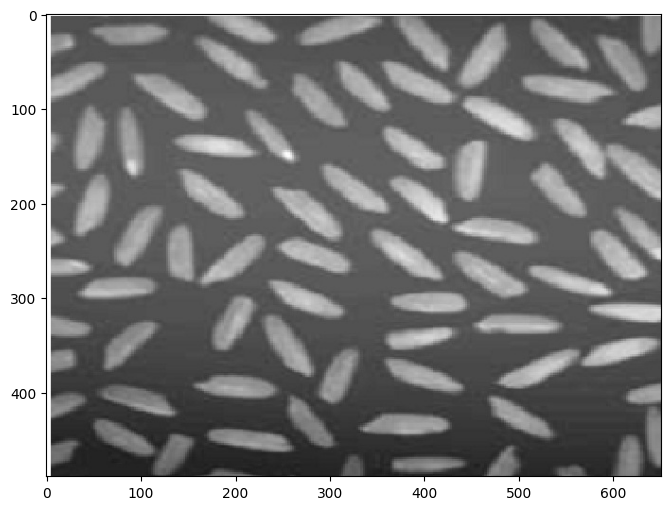

In [135]:
plt.figure(figsize=(12,6))
plt.imshow(rice)
plt.show()

In [136]:
rice_contrast = (255/(np.max(rice) - np.min(rice))) * (rice - np.min(rice))

In [137]:
rice_contrast = np.array(rice_contrast, dtype = np.uint8)

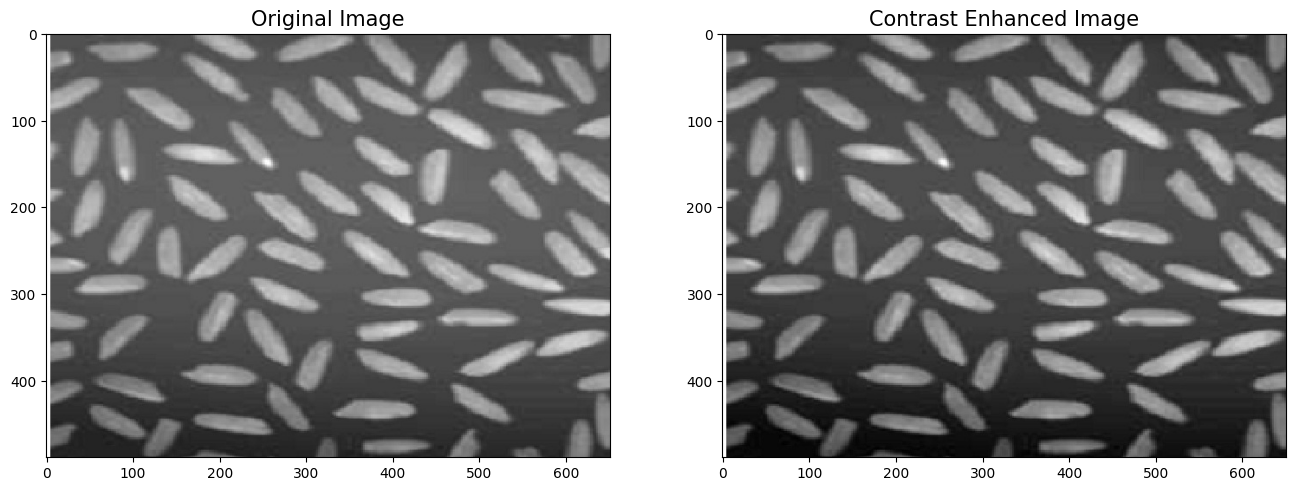

In [138]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(rice, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Contrast Enhanced Image", fontsize = 15)
plt.imshow(rice_contrast, cmap = 'gray')
plt.show()

# Piecewise-Linear Transformation Functions

In [139]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return ((s1-0) / (r1-0)) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  

In [140]:
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255

In [141]:
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

In [142]:
# Apply contrast stretching.
rice_piecewise = pixelVal_vec(rice, r1, s1, r2, s2)

In [143]:
rice_piecewise = np.array(rice_piecewise, dtype = np.uint8)

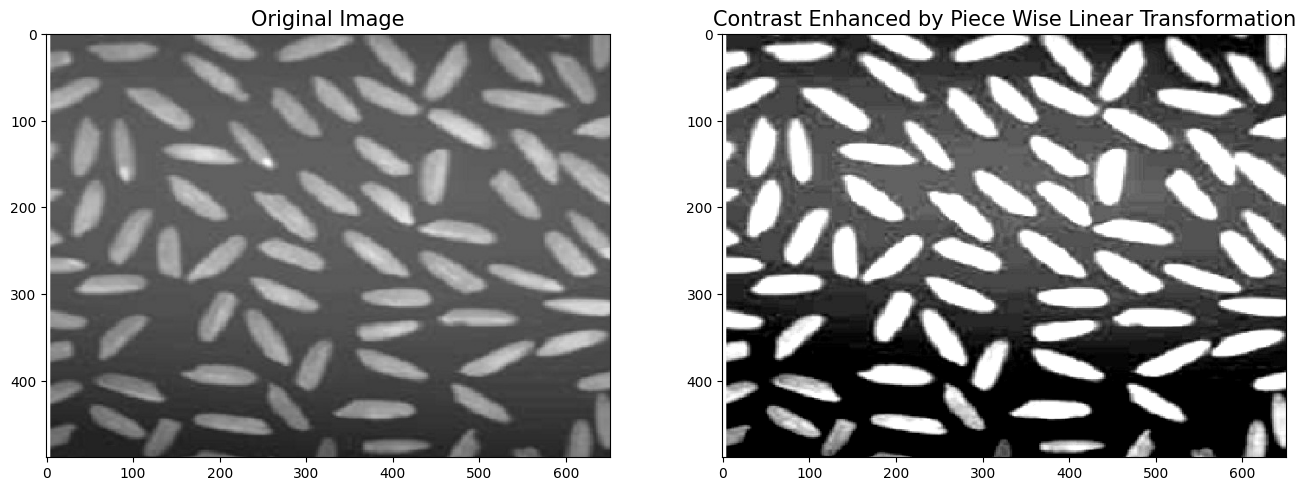

In [144]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Original Image", fontsize = 15)
plt.imshow(rice, cmap = 'gray')
plt.subplot(1,2,2)
plt.title("Contrast Enhanced by Piece Wise Linear Transformation", fontsize = 15)
plt.imshow(rice_piecewise, cmap = 'gray')
plt.show()

# Understanding np.vectorize

In [ ]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

In [ ]:
myfunc(3,4)

In [ ]:
vfunc = np.vectorize(myfunc)

In [ ]:
vfunc([1, 2, 3, 4], 2)

In [ ]:
vfunc(3,4)